In [596]:
import warnings
warnings.filterwarnings('ignore')
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

## Data reading

- reading the CSV

In [661]:
df = pd.read_csv('phishing_site_urls.csv')
print('Shape of DataFrame:', df.shape)
print('Size of DataFrame:', df.size)

Shape of DataFrame: (549346, 2)
Size of DataFrame: 1098692


- checking first five rows

In [662]:
df.head()

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad


- checking last five rows

In [663]:
df.tail()


,URL,Label
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad
549345,apple-search.info,bad


## concise summary of our dataset

In [664]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


## Describing the Data

In [665]:
df.describe(exclude='number').T

,count,unique,top,freq
URL,549346,507195,jhomitevd2abj3fk.tor2web.org/,52
Label,549346,2,good,392924


## Checking for null values

In [666]:
df.isna().sum()

URL      0
Label    0
dtype: int64

## Checking if there are duplicates

In [667]:
df.duplicated().sum()

42150

In [668]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(549346, 2)
(507196, 2)


## Data ploting

In [694]:
countTypes = df.Label.value_counts()
countTypes

good    392897
bad     114299
Name: Label, dtype: int64

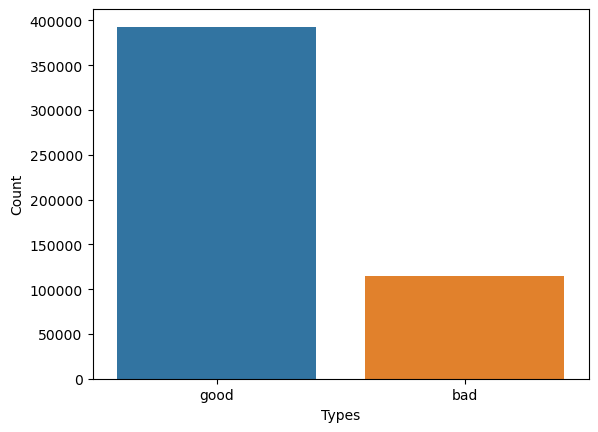

In [696]:
sns.barplot(x=countTypes.index, y=countTypes)
plt.xlabel('Types')
plt.ylabel('Count');

# Machine learning modeling

## Features Selection

In [632]:
df.columns

Index(['name', 'categories', 'address', 'lat', 'lng', 'price', 'likes',
       'photos', 'tips', 'rating', 'ratingSignals'],
      dtype='object')

We would choose price column as our target and for the features we would discard the two columns name and address as they don't contribute to our model